<a href="https://colab.research.google.com/github/SanjaySaatyaki/pytorch_4_ml_dl/blob/main/03_python__computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- torchvision - base domain lib for Pytorch
- torchvision.datasets - get datasets and data loading functions for computer vision
- torchvision.models - get pretrained computer vision models
- torchvision.transforms - functions for manipulating vision data to suitable ML use
torch.utils.data.Dataset - Base dataset class for Pytorch
troch.utils.data.DataLoder - Create a Python iterable over dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt



## Getting a dataset
FashionMNIST

In [2]:
#Setup training data
train_data = datasets.FashionMNIST(root="data",#where to download data to
                                   train=True,#do we want training data
                                   download=True,#do we wanna download
                                   transform=torchvision.transforms.ToTensor(),#how to transform the data
                                   target_transform=None#how do we want to tranform the labels
                                   )

test_data = datasets.FashionMNIST(root="data",
                                  train=False,
                                  download=True,
                                  transform=torchvision.transforms.ToTensor(),
                                  target_transform=None)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 3.57MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 52.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]


In [3]:
len(train_data),len(test_data)

(60000, 10000)

In [4]:
# See 1st training example
image,label = train_data[0]

In [5]:
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
image.shape, label # print image shape and label

(torch.Size([1, 28, 28]), 9)

In [10]:
print(f"Image Label:{class_names[label]}")

Image Label:Ankle boot


Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

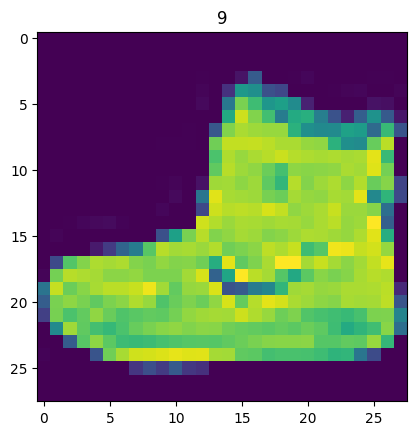

In [11]:
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, '9')

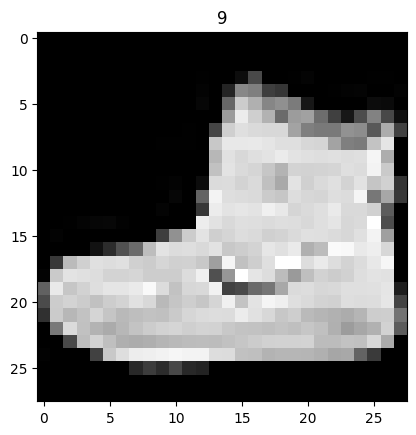

In [12]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)

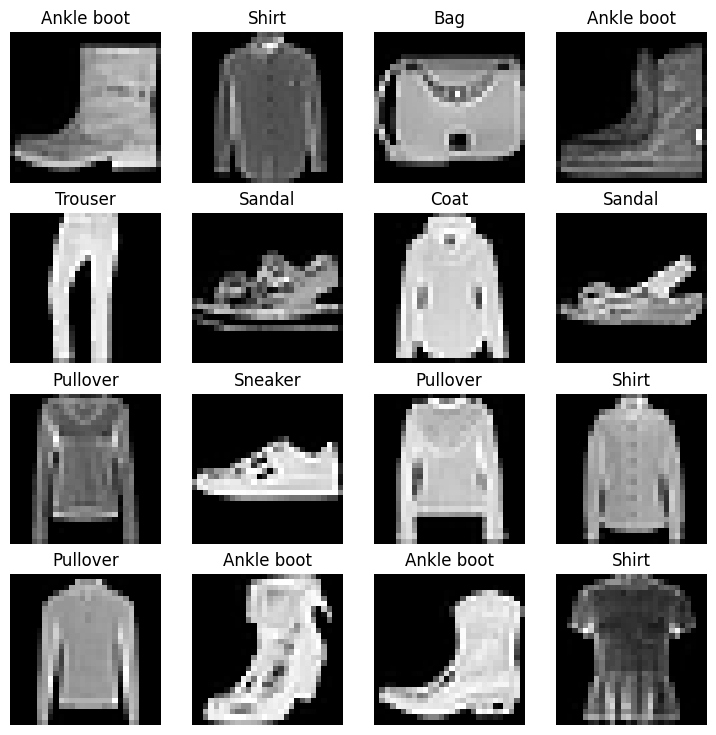

In [13]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols =4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)


# Prepare DataLoader

DataLoader turns our dataset into Python iterable
Turn data into batches(or mini batches)

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_data_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_data_loader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

In [15]:
train_data_loader,test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x7965e93a0a10>,
 <torch.utils.data.dataloader.DataLoader at 0x7965e9406a50>)

In [16]:
print(f"DataLoaders: {train_data_loader,test_data_loader}")
print(f"Length of train_dataloader,{len(train_data_loader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader,{len(test_data_loader)},batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7965e93a0a10>, <torch.utils.data.dataloader.DataLoader object at 0x7965e9406a50>)
Length of train_dataloader,1875 batches of 32
Length of test_dataloader,313,batches of 32


In [17]:
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label sie:torch.Size([])


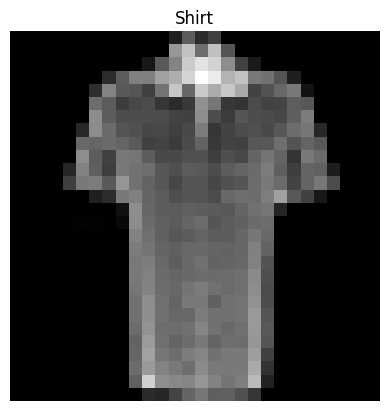

In [18]:
torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(),cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label sie:{label.shape}")

Model 0: Build a Baseline model

when starting to build a series of machine learning modelling experiments its best practice to start with a baseline model

A baseline model is a simple model you will try and imporve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [19]:
flatten_model = nn.Flatten()

x= train_features_batch[0]
output = flatten_model(x)

print(f"Shape before flattening:{x.shape}") # [colour_channels,height,widths]
print(f"Shape after flatterning:{output.shape}")#[colour_channels,height*widths]

Shape before flattening:torch.Size([1, 28, 28])
Shape after flatterning:torch.Size([1, 784])


In [20]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape,hidden_units,output_shape) -> None:
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,out_features=output_shape))

  def forward(self,x):
    return self.layer_stack(x)

In [21]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

In [22]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [23]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss, optimizer, eval metrics

- Loss fn - nn.CrossEntorpyLoss
- Optimizer = torch.optim.SGD
- Evaluation metrci = Accuracy

In [24]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Already Exists")
else:
  print("Downloading")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py","wb") as f:
    f.write(request.content)

Downloading


In [25]:
from helper_function import accuracy_fn

In [26]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

### Create a funcion to time our experiments

Main Things to Track:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [27]:
from timeit import default_timer as timer

def print_train_time(start: float,end: float, device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

Training Loop

1. Loop through epochs
2. Loop through training batches, perform training steps, calcuate train loss *per batch*.
3. Loop through test batches. perform testing setps. Calculate test loss *per batch*.

In [28]:
from tqdm.auto import tqdm

#Set sedd and start timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch :{epoch}")
  train_loss = 0
  for batch, (X,y) in enumerate(train_data_loader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss #accumlate train loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_data_loader.dataset)} samples")

  train_loss /= len(train_data_loader)

  # Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_data_loader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # Class test loss and avg per batch
    test_loss /= len(test_data_loader)
    test_acc /= len(test_data_loader)

  print(f"Train Loss: {train_loss:4f} | Test Loss: {test_loss:4f} | Test acc:{test_acc}")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))
print(total_train_time_model_0)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch :0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.590389 | Test Loss: 0.509535 | Test acc:82.03873801916933
Epoch :1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.476332 | Test Loss: 0.479890 | Test acc:83.19688498402556
Epoch :2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.455033 | Test Loss: 0.476639 | Test acc:83.42651757188499
Train time on cpu: 32.211 seconds
32.21117289


In [30]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Make Pedictions and get Model results

In [31]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):

  # Returns dict results of model predictions
  loss, acc = 0 , 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X,y = X.to(device),y.to(device)
      y_pred = model(X)

      loss+=loss_fn(y_pred,y)
      acc+= accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    #Scale loss and acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}
model_0_results = eval_model(model=model_0, data_loader=test_data_loader, loss_fn=loss_fn, accuracy_fn=accuracy_fn,device=device)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Setup Device agnoistic code

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [33]:
device

'cuda'

In [34]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_feature,hidden_units,output_features) -> None:
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_feature,out_features=hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units,out_features= output_features),
                                    #  nn.ReLU()
                                    )

  def forward(self, x):
    return self.layer_stack(x)

In [35]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_feature=784,output_features=len(class_names),hidden_units=10).to(device)

In [36]:
next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [37]:
from helper_function import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.1)

## Functionizing trian and eval Loops

In [38]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn,target_device):
  train_loss, train_acc=0,0

  model.train()
  for batch, (X,y) in enumerate(data_loader):
    X, y = X.to(device),y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred,y)

    train_loss += loss
    train_acc = accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss} | Train Acc: {train_acc}")


In [39]:
def test_step(model, data_loader, loss_fn,accuracy_fn, target_device):
  test_loss,test_acc =0,0

  model.eval()
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      X_test, y_test = X_test.to(device),y_test.to(device)

      test_pred = model(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test Loss:{test_loss:.5f} | Test acc: {test_acc:.2f}")




In [40]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}")
  train_step(model_1,
             data_loader=train_data_loader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             target_device=device)
  test_step(model=model_1,
            data_loader=test_data_loader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            target_device=device)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
Train Loss: 0.6442940831184387 | Train Acc: 0.045
Test Loss:0.54185 | Test acc: 80.68
Epoch: 1
Train Loss: 0.47848841547966003 | Train Acc: 0.04833333333333333
Test Loss:0.46595 | Test acc: 83.53
Epoch: 2
Train Loss: 0.44442135095596313 | Train Acc: 0.041666666666666664
Test Loss:0.49056 | Test acc: 83.20
Train time on cuda: 29.054 seconds


In [41]:
model_1_results = eval_model(model=model_1,data_loader=test_data_loader,loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [42]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4905567467212677,
 'model_acc': 83.19688498402556}

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model2 : Building a Conventional Neural Network

- https://poloclub.github.io/cnn-explainer/

In [74]:
class FashionMNISTModelV2(nn.Module):
  """
  Model Achitecture that replicate TinyVGG
  """
  def __init__(self, input_shape, hidden_units, output_shape) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x)
    return x



In [75]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device=device)

In [76]:
list(model_2.parameters())

[Parameter containing:
 tensor([[[[ 0.2548,  0.2767, -0.0781],
           [ 0.3062, -0.0730,  0.0673],
           [-0.1623,  0.1958,  0.2938]]],
 
 
         [[[-0.2445,  0.2897,  0.0624],
           [ 0.2463,  0.0451,  0.1607],
           [-0.0471,  0.2570,  0.0493]]],
 
 
         [[[-0.1556,  0.0850, -0.1536],
           [-0.0391, -0.1354,  0.2211],
           [-0.2631, -0.1537, -0.0941]]],
 
 
         [[[-0.2004,  0.0315, -0.3292],
           [ 0.3010, -0.2832,  0.2573],
           [ 0.0555, -0.1082,  0.2060]]],
 
 
         [[[ 0.0520,  0.2693,  0.0364],
           [-0.1051,  0.0896, -0.0904],
           [ 0.1403,  0.2976,  0.1927]]],
 
 
         [[[-0.1457,  0.1924,  0.0596],
           [ 0.1693, -0.2032, -0.3300],
           [-0.1288, -0.2557,  0.2735]]],
 
 
         [[[ 0.0960,  0.1381,  0.1054],
           [-0.0058,  0.2609, -0.2368],
           [ 0.0210, -0.2275,  0.1028]]],
 
 
         [[[-0.1148,  0.1021, -0.0694],
           [ 0.2765, -0.1976, -0.1988],
           [-0.

## Stepping through nn.Conv2D

In [47]:
torch.manual_seed(42)

In [48]:
# Create a batch of images
images = torch.rand(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single Image shape:{test_image.shape}")
# print(f"Test image:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single Image shape:torch.Size([3, 64, 64])


In [49]:
# Create Single conv2d Layer
conv_layer = nn.Conv2d(in_channels=3,out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image)

In [50]:
conv_output.shape

torch.Size([10, 62, 62])

In [51]:
test_image.shape

torch.Size([3, 64, 64])

In [52]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

max_pool_output = max_pool_layer(test_image)
max_pool_output.shape

torch.Size([3, 32, 32])

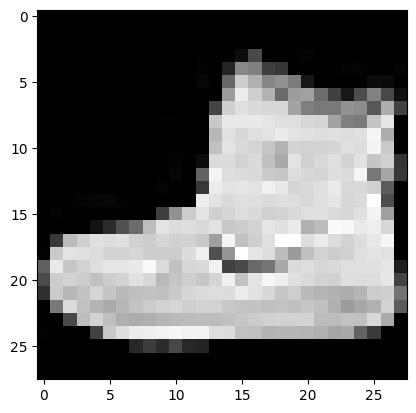

In [54]:
plt.imshow(image.squeeze(),cmap="gray")

In [80]:
rand_image = torch.rand(size=(1,28,28)).to(device)

In [82]:
rand_image.shape

torch.Size([1, 28, 28])

In [83]:
model_2(rand_image.unsqueeze(0))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
tensor([[-0.0646,  0.0141, -0.0377, -0.0811,  0.0161, -0.0471,  0.0100, -0.0190,
         -0.0138,  0.0998]], device='cuda:0', grad_fn=<AddmmBackward0>)


tensor([[-0.0646,  0.0141, -0.0377, -0.0811,  0.0161, -0.0471,  0.0100, -0.0190,
         -0.0138,  0.0998]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [85]:
model_2(image.unsqueeze(0).to(device))

torch.Size([1, 10, 14, 14])
torch.Size([1, 10, 7, 7])
tensor([[-0.0546,  0.0080, -0.0390, -0.0824,  0.0148, -0.0413,  0.0218, -0.0270,
         -0.0338,  0.0921]], device='cuda:0', grad_fn=<AddmmBackward0>)


tensor([[-0.0546,  0.0080, -0.0390, -0.0824,  0.0148, -0.0413,  0.0218, -0.0270,
         -0.0338,  0.0921]], device='cuda:0', grad_fn=<AddmmBackward0>)